In [3]:
#ICP 6 Assingment
#Name: Gopi Reddy Pallerla
#Topic: Autoencoders

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.6971 - val_loss: 0.6968
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6967 - val_loss: 0.6964
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6964 - val_loss: 0.6961
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6960 - val_loss: 0.6957
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6956 - val_loss: 0.6954


In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.6993 - val_loss: 0.6990
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.6990 - val_loss: 0.6987
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6986 - val_loss: 0.6984
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6983 - val_loss: 0.6981
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6980 - val_loss: 0.6978
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6977 - val_loss: 0.6975
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6975 - val_loss: 0.6972
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6972 - val_loss: 0.6969
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.6969 - val_loss: 0.6967
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6966 - val_loss: 0.6964


In [4]:
#Adding one more hidden layer to autoencoder
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Load data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Define stacked autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - binary_accuracy: 0.4620 - loss: 0.4569 - val_binary_accuracy: 0.5009 - val_loss: 0.3168
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - binary_accuracy: 0.5041 - loss: 0.3115 - val_binary_accuracy: 0.5035 - val_loss: 0.3072
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - binary_accuracy: 0.5054 - loss: 0.3029 - val_binary_accuracy: 0.5038 - val_loss: 0.3007
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - binary_accuracy: 0.5065 - loss: 0.2972 - val_binary_accuracy: 0.5048 - val_loss: 0.2974
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - binary_accuracy: 0.5069 - loss: 0.2945 - val_binary_accuracy: 0.5045 - val_loss: 0.2945
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - binary_accuracy: 0.5074 - loss: 0.2917 - val_binary_accuracy: 0.5045 - val_loss: 0.2928
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - binary_accuracy: 0.5068 - loss: 0.2898 - val_binary_accuracy: 0.5050 - val_loss: 0.2909

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


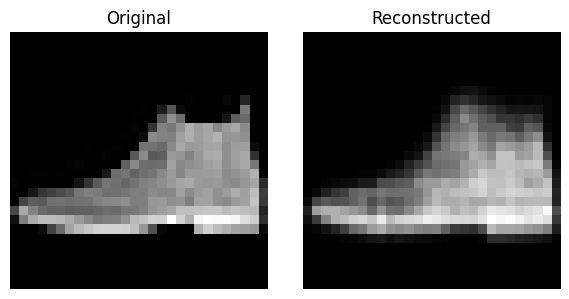

In [6]:
#predict and visualize Reconstructed vs original Image
# Predict test sample
decoded_imgs = autoencoder.predict(x_test)

# Visualize one image
plt.figure(figsize=(6, 3))

# Original
plt.subplot(1, 2, 1)
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title("Original")
plt.axis('off')

# Reconstructed
plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[0].reshape(28, 28), cmap='gray')
plt.title("Reconstructed")
plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
#Repeating step 2 with denoising Autoencoder
# Add noise
def add_noise(x, factor=0.5):
    noisy = x + factor * np.random.normal(loc=0.0, scale=1.0, size=x.shape)
    return np.clip(noisy, 0., 1.)

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Build same architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train with noisy input
history_denoise = denoising_autoencoder.fit(x_train_noisy, x_train,
                                            epochs=10,
                                            batch_size=256,
                                            shuffle=True,
                                            validation_data=(x_test_noisy, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - binary_accuracy: 0.4647 - loss: 0.4709 - val_binary_accuracy: 0.4954 - val_loss: 0.3390
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - binary_accuracy: 0.5005 - loss: 0.3294 - val_binary_accuracy: 0.4994 - val_loss: 0.3227
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - binary_accuracy: 0.5033 - loss: 0.3184 - val_binary_accuracy: 0.5007 - val_loss: 0.3170
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - binary_accuracy: 0.5042 - loss: 0.3131 - val_binary_accuracy: 0.5012 - val_loss: 0.3141
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - binary_accuracy: 0.5044 - loss: 0.3101 - val_binary_accuracy: 0.5030 - val_loss: 0.3113
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - binary_accuracy: 0.5039 - loss: 0.3076 - val_binary_accuracy: 0.5029 - val_loss: 0.3093
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - binary_accuracy: 0.5049 - loss: 0.3054 - val_binary_accuracy: 0.5032 - val_loss: 0.3076

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


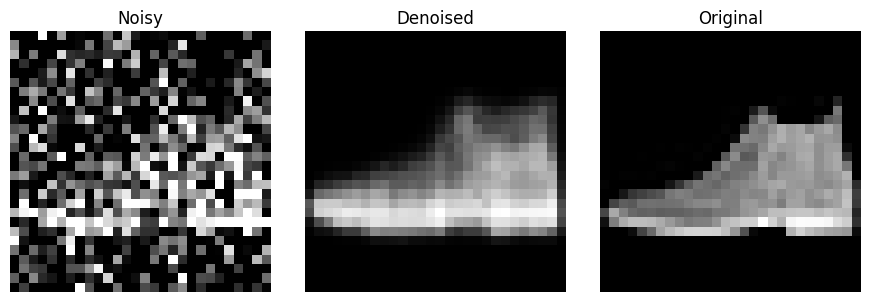

In [8]:
#visualize Noisy Vs Reconstructed vs original
decoded_denoise = denoising_autoencoder.predict(x_test_noisy)

plt.figure(figsize=(9, 3))

# Noisy input
plt.subplot(1, 3, 1)
plt.imshow(x_test_noisy[0].reshape(28, 28), cmap='gray')
plt.title("Noisy")
plt.axis('off')

# Reconstructed
plt.subplot(1, 3, 2)
plt.imshow(decoded_denoise[0].reshape(28, 28), cmap='gray')
plt.title("Denoised")
plt.axis('off')

# Original
plt.subplot(1, 3, 3)
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title("Original")
plt.axis('off')

plt.tight_layout()
plt.show()


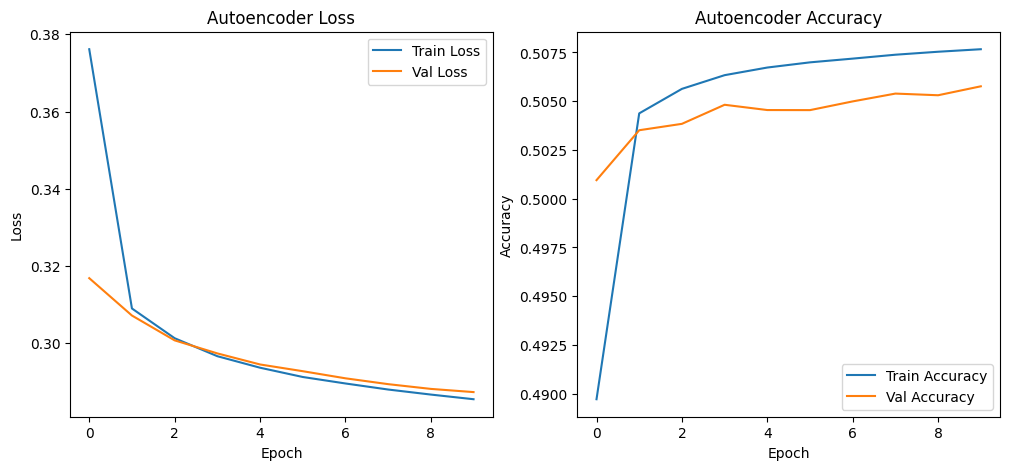

In [9]:
#plotting Loss and Accuracy for Both Models
# Autoencoder loss & accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Autoencoder Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Val Accuracy')
plt.title("Autoencoder Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


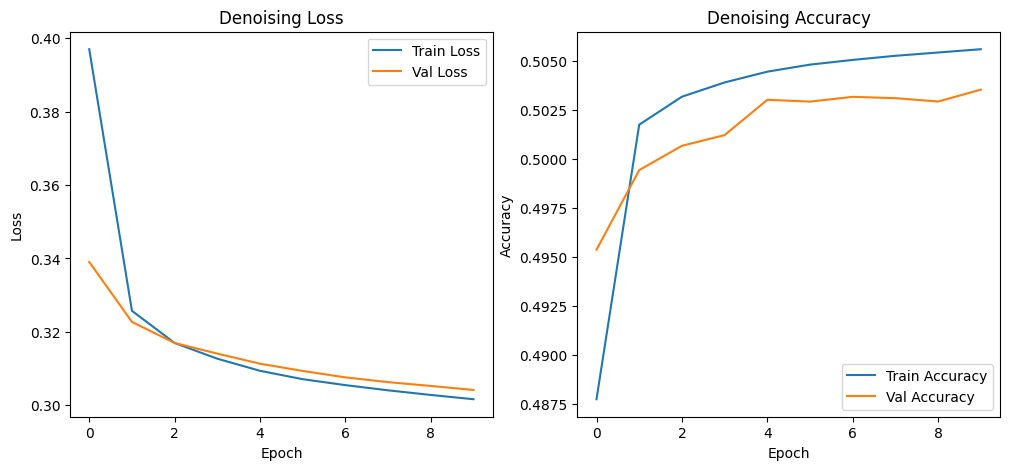

In [10]:
#denoising autoencoder loss & Accuracy
# Denoising autoencoder loss & accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_denoise.history['loss'], label='Train Loss')
plt.plot(history_denoise.history['val_loss'], label='Val Loss')
plt.title("Denoising Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_denoise.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history_denoise.history['val_binary_accuracy'], label='Val Accuracy')
plt.title("Denoising Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
